<a href="https://colab.research.google.com/github/siva12309521/Data-Science-Mini-Projects/blob/main/Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import os



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**📊 Dataset Title:**

**Indian Traffic Sign Classes and Categories**

In [ ]:
traffic=pd.read_csv("/content/drive/MyDrive/data/traffic_sign.csv")
traffic

,ClassId,Name
0,0,Give way
1,1,No entry
2,2,One-way traffic
3,3,One-way traffic
4,4,No vehicles in both directions
5,5,No entry for cycles
6,6,No entry for goods vehicles
7,7,No entry for pedestrians
8,8,No entry for bullock carts
9,9,No entry for hand carts


**About Dataset**

Indian traffic sign dataset was used to work on a Traffic sign detection and recognition system.

The dataset can be used for any Traffic Sign project based on Image Classification.

The images in the dataset are of dimension 32 32 3.

The dataset was created by an image of each class taken from government website and further image scaling was performed.

The Images are Preprocessed, Grayscaled and Standardized Lighting.

In [ ]:
traffic.shape

(59, 2)

In [ ]:
traffic.columns

Index(['ClassId', 'Name'], dtype='object')

In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ClassId  59 non-null     int64 
 1   Name     59 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
type(traffic)

pandas.core.frame.DataFrame

In [ ]:
traffic.describe()

,ClassId
count,59.000000
mean,29.000000
std,17.175564
min,0.000000
25%,14.500000
50%,29.000000
75%,43.500000
max,58.000000


In [ ]:
traffic.isnull().sum()

,0
ClassId,0
Name,0


In [ ]:
traffic.duplicated().sum()

np.int64(0)

In [ ]:
traffic['Name'].nunique()

52

In [ ]:
# 🎯 Are any ClassIds repeated with the same or different name?
duplicates = traffic[traffic.duplicated(subset='ClassId', keep=False)]
print("\n⚠️ Repeated ClassIds (possibly different names):")
print(duplicates.sort_values('ClassId'))


⚠️ Repeated ClassIds (possibly different names):
Empty DataFrame
Columns: [ClassId, Name]
Index: []


In [ ]:
traffic.dtypes

,0
ClassId,int64
Name,object


In [ ]:
traffic['Name'] = traffic['Name'].replace({
    'No entry for bullock carts': 'No entry (animal carts)',
    'No entry for hand carts': 'No entry (manual carts)',
    'One-way traffic': 'One-way',
    'Horn prohibited': 'No horn'})

# 🔍 Preview the updated values
print(traffic.head())

   ClassId                            Name
0        0                        Give way
1        1                        No entry
2        2                         One-way
3        3                         One-way
4        4  No vehicles in both directions


In [ ]:
# Shorten long names to 3 words max
traffic['Name'] = traffic['Name'].apply(lambda x: ' '.join(x.split()[:3]))

# Preview
print(traffic.head())


   ClassId            Name
0        0        Give way
1        1        No entry
2        2         One-way
3        3         One-way
4        4  No vehicles in


In [ ]:
traffic['Name'] = traffic['Name'].astype('category')


In [ ]:
traffic.dtypes

,0
ClassId,int64
Name,category


In [ ]:
print(f"Total number of traffic sign classes: {traffic.shape[0]}")
print("\nSample entries:\n", traffic.head())

Total number of traffic sign classes: 59

Sample entries:
    ClassId            Name
0        0        Give way
1        1        No entry
2        2         One-way
3        3         One-way
4        4  No vehicles in


**Dataset Aim:**

**This dataset maps ClassId values to their corresponding traffic sign names and can be used for:**

**Training and evaluating image classification models**

**Building intelligent transportation systems (ITS)**

**Developing driver-assistance systems**

**Creating road safety and navigation applications**

<ipython-input-37-7d14cf7b8ce0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Name', data=traffic, order=traffic['Name'].value_counts().index, palette='viridis')


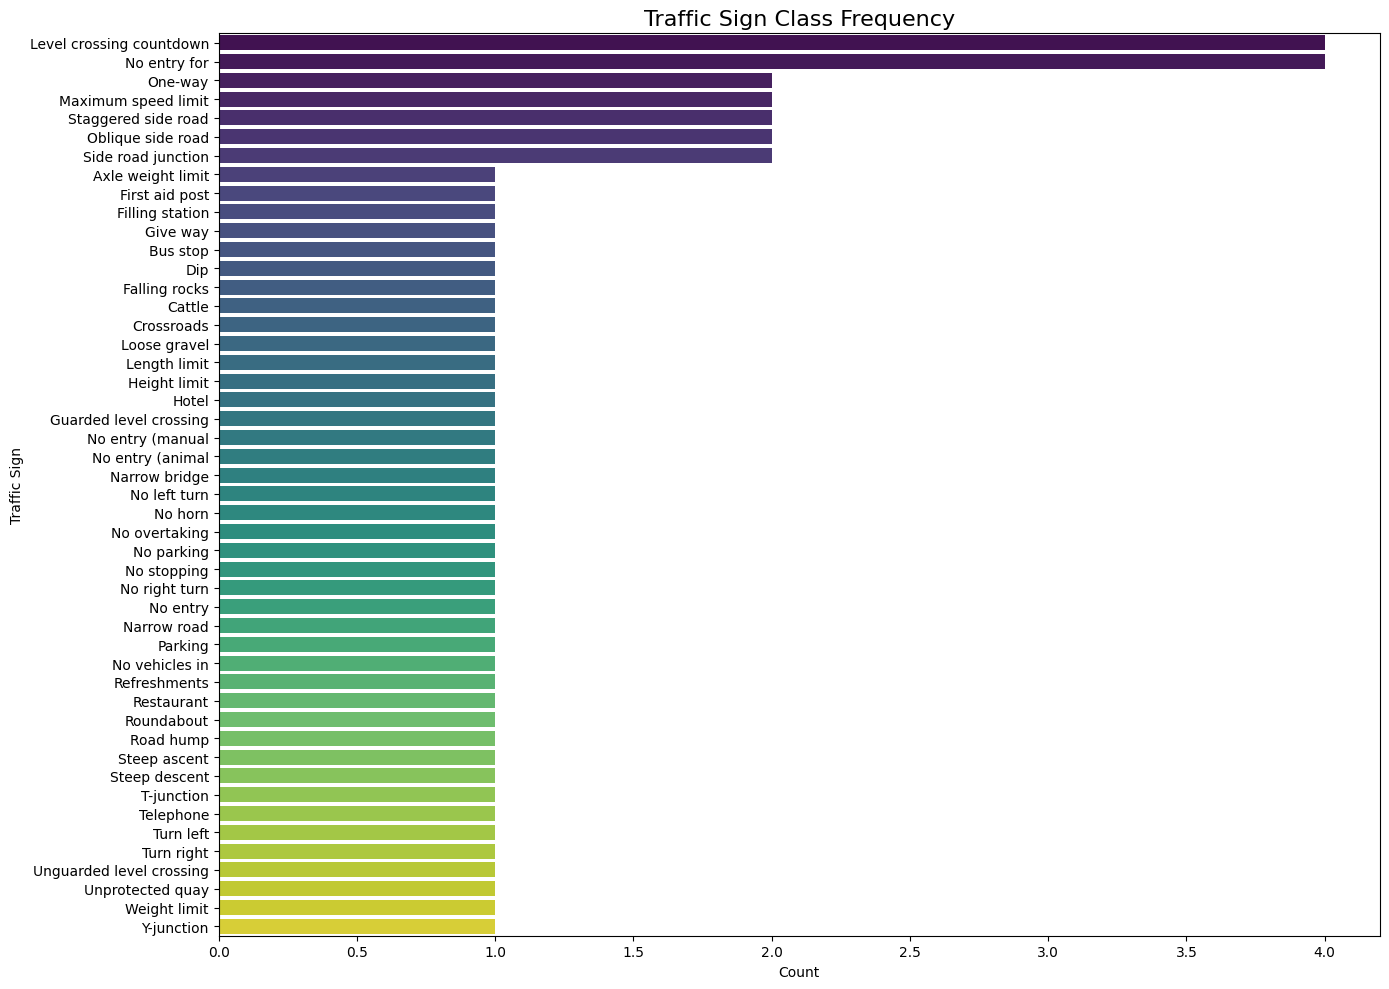

In [ ]:
plt.figure(figsize=(14, 10))
sns.countplot(y='Name', data=traffic, order=traffic['Name'].value_counts().index, palette='viridis')
plt.title("Traffic Sign Class Frequency", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Traffic Sign")
plt.tight_layout()
plt.show()

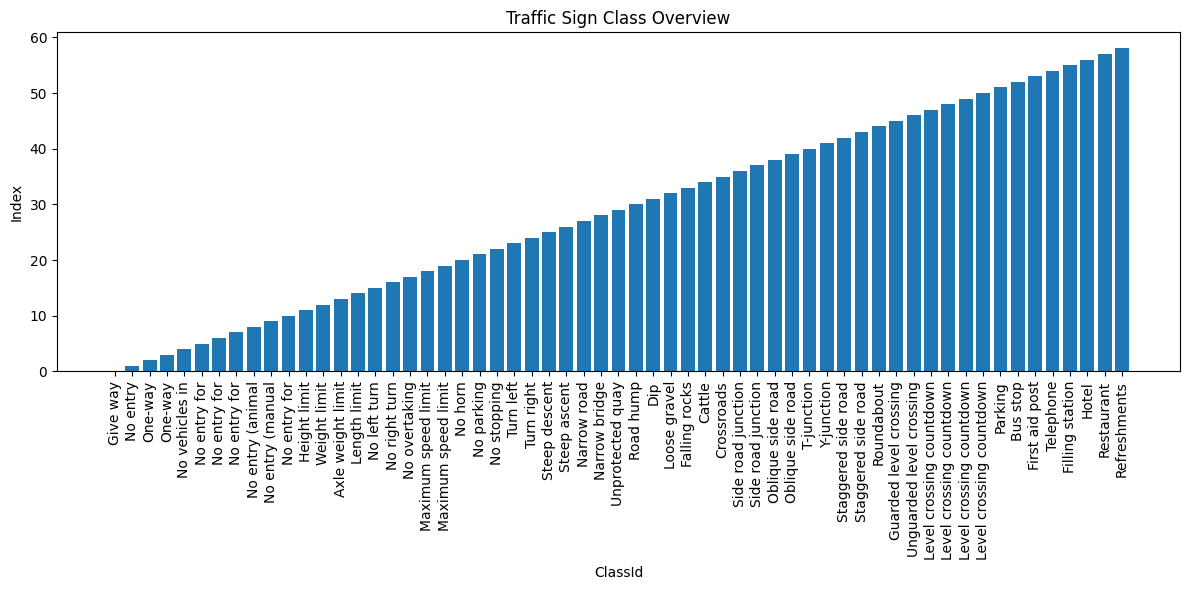

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(traffic['ClassId'], range(len(traffic['ClassId'])), tick_label=traffic['Name'])
plt.xticks(rotation=90)
plt.title('Traffic Sign Class Overview')
plt.xlabel('ClassId')
plt.ylabel('Index')
plt.tight_layout()
plt.show()


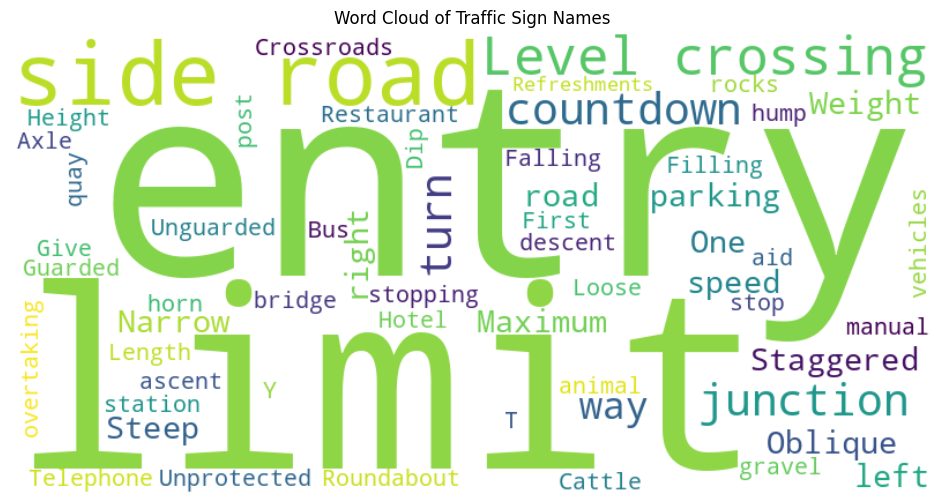

In [ ]:
from wordcloud import WordCloud

text = " ".join(traffic['Name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Traffic Sign Names")
plt.show()

In [ ]:
# Creating x and y
x=traffic.drop("Name",axis=1)
y=traffic ["Name"]

In [ ]:
# Create a LabelEncoder to convert 'Name' to numerical labels
label_encoder = LabelEncoder()
# Fit the encoder on the entire 'Name' column (before splitting)
label_encoder.fit(traffic['Name'])

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Transform 'Name' in both training and testing sets
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


model = RandomForestRegressor(random_state=42)
# Fit the model using the encoded target variable
model.fit(x_train, y_train_encoded)

RandomForestRegressor(random_state=42)

In [ ]:
y_mode=model.predict(x_test)
y_mode

array([21.65, 25.4 ,  7.67, 13.16, 37.46, 12.61, 15.78, 40.61, 35.53,
       14.39, 15.64, 27.55])

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([21.65, 25.4 ,  7.67, 13.16, 37.46, 12.61, 15.78, 40.61, 35.53,
       14.39, 15.64, 27.55])

In [ ]:
score = model.score(x_test, y_test_encoded)
print(f"R^2 Score: {score}")

R^2 Score: -0.21257297581839119


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_encoded, y_mode)
r2 = r2_score(y_test_encoded, y_mode)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 255.95
R-squared: -0.21
